In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("C:/Users/thinkpad/OneDrive/Bureau/real_estate_agent.csv")

In [3]:
# questions to answer:
    
#     For a strategy focused on profiting through rental income, what are the key property features that yield the highest monthly rent relative to purchase price?
    
#     If prioritizing long-term property value growth, what conditions and age ranges (year_built) indicate the best investment prospects?
    
#     If I want to invest in properties with potential for renovation value increase, which condition categories and price ranges should I target for maximum ROI?    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              70000 non-null  object 
 1   region_type           70000 non-null  object 
 2   property_type         70000 non-null  object 
 3   year_built            70000 non-null  int64  
 4   condition             70000 non-null  object 
 5   furnishing            70000 non-null  object 
 6   bedrooms              70000 non-null  int64  
 7   bathrooms             70000 non-null  object 
 8   stories               70000 non-null  int64  
 9   parking               70000 non-null  int64  
 10  garden                70000 non-null  bool   
 11  lot_area_sqft         70000 non-null  float64
 12  floor_area_sqft       70000 non-null  float64
 13  price_usd             70000 non-null  float64
 14  property_tax_usd      70000 non-null  float64
 15  insurance_usd      

In [5]:
# Get categorical columns and their unique categories
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

categories_dict = {}
for col in categorical_cols:
    categories_dict[col] = df[col].unique()

for col, cats in categories_dict.items():
    print(f"{col}: {cats}")

location: ['San Diego, CA' 'Chicago, IL' 'San Jose, CA' 'Los Angeles, CA'
 'San Antonio, TX' 'Dallas, TX' 'Houston, TX' 'Phoenix, AZ'
 'Philadelphia, PA' 'New York, NY']
region_type: ['Urban' 'Suburban']
property_type: ['Townhouse' 'Apartment' 'House' 'Bungalow' 'Loft']
condition: ['New' 'Good' 'Excellent' 'Needs Renovation' 'Fair']
furnishing: ['Semi-Furnished' 'Unfurnished' 'Furnished']
bathrooms: ['3 Baths' '2 Baths' '1 Bath' '5+ Baths' '4 Baths']
garden: [False  True]


In [6]:
df.describe()

,year_built,bedrooms,stories,parking,lot_area_sqft,floor_area_sqft,price_usd,property_tax_usd,insurance_usd,maintenance_usd,rent_usd_month,median_income_usd,employment_rate,cost_of_living_index,crime_index,safety_index
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1987.097343,3.008243,1.999600,1.504829,2296.010055,1432.483326,455497.021984,4554.970220,2277.485110,980.953704,6608.158553,78153.728571,0.932406,96.318757,61.100414,38.899586
std,21.582242,1.415174,0.816724,1.115652,2444.798307,455.262564,93142.479459,931.424795,465.712397,564.019087,2433.855041,14692.321897,0.022414,15.834038,9.984862,9.984862
min,1950.000000,1.000000,1.000000,0.000000,0.000000,300.000000,205184.610300,2051.846103,1025.923051,200.003075,1906.331852,60000.000000,0.900000,80.000000,40.000000,25.000000
25%,1968.000000,2.000000,1.000000,1.000000,55.667933,1037.339635,384986.143975,3849.861440,1924.930720,568.048907,4868.031214,68000.000000,0.910000,85.000000,55.000000,32.000000
50%,1987.000000,3.000000,2.000000,2.000000,1421.010936,1409.813631,449022.548600,4490.225486,2245.112743,867.767593,6115.275060,72000.000000,0.930000,90.000000,65.000000,35.000000
75%,2006.000000,4.000000,3.000000,3.000000,3989.200030,1800.057889,517988.267925,5179.882679,2589.941339,1174.185846,7813.327745,85000.000000,0.950000,100.000000,68.000000,45.000000
max,2024.000000,5.000000,3.000000,3.000000,9084.125830,3041.561916,856222.027900,8562.220279,4281.110140,2499.999911,23074.869850,110000.000000,0.970000,130.000000,75.000000,60.000000


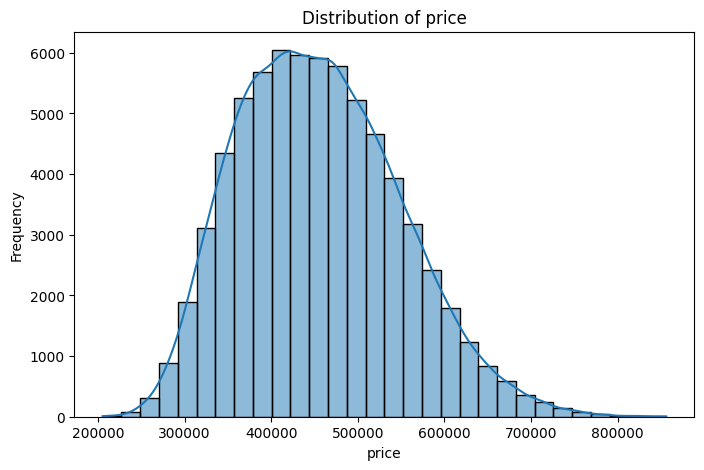

In [7]:
# Visualize the distribution of the 'ROI' column
plt.figure(figsize=(8, 5))
sns.histplot(df['price_usd'], kde=True, bins=30)
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

<Axes: >

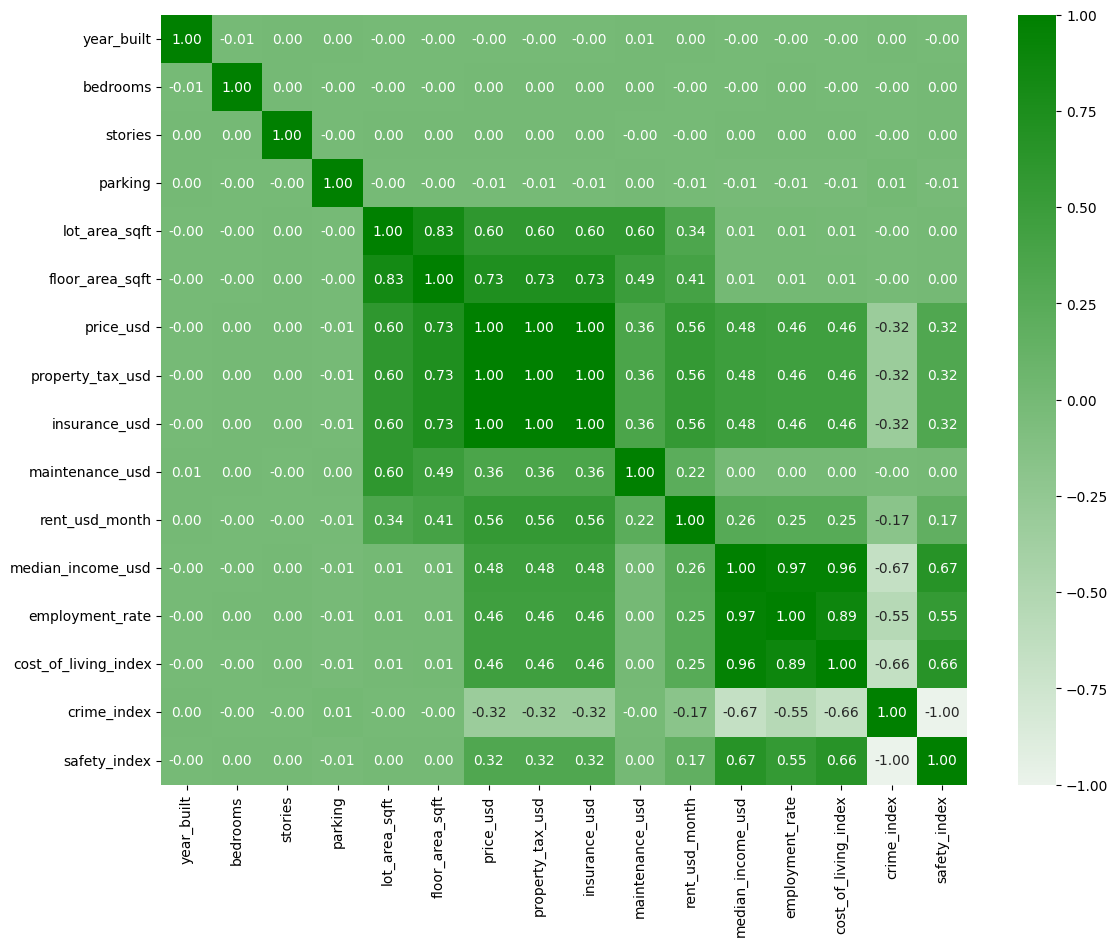

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [13, 10]
df_numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap=sns.light_palette("green", as_cmap=True))   

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_2124\2449592659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values, palette="viridis")


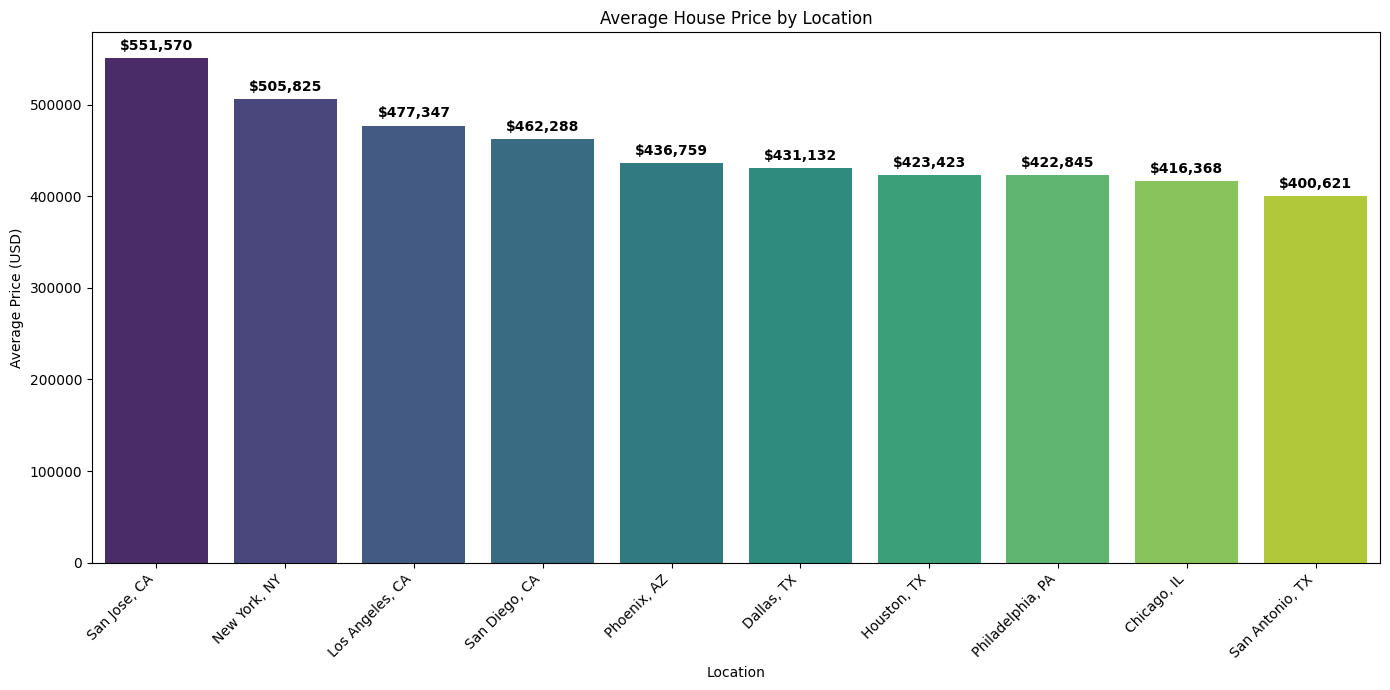

In [9]:
# Calculate average price for each location
avg_price_by_location = df.groupby('location')['price_usd'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))
bars = sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values, palette="viridis")

# Annotate each bar with the average price
for i, v in enumerate(avg_price_by_location.values):
    plt.text(i, v + avg_price_by_location.max()*0.01, f"${v:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average House Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_2124\923683975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette="mako")


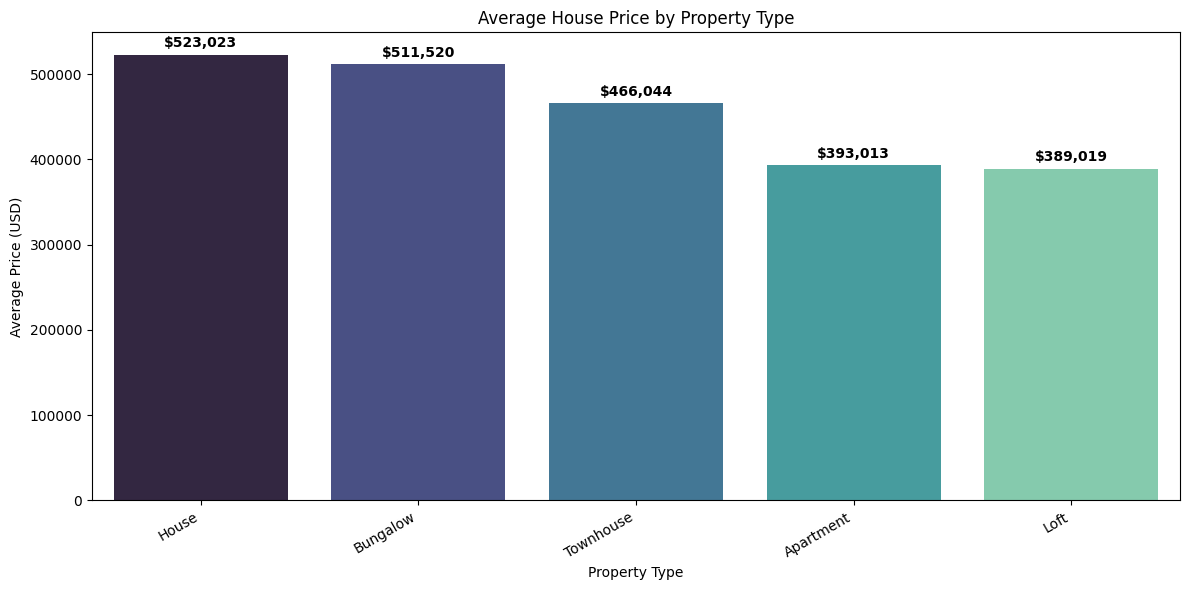

In [10]:
# Calculate average price for each property type
avg_price_by_type = df.groupby('property_type')['price_usd'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette="mako")

# Annotate each bar with the average price
for i, v in enumerate(avg_price_by_type.values):
    plt.text(i, v + avg_price_by_type.max()*0.01, f"${v:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average House Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_2124\4084610630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=avg_price_by_furnishing.index, y=avg_price_by_furnishing.values, palette="crest")


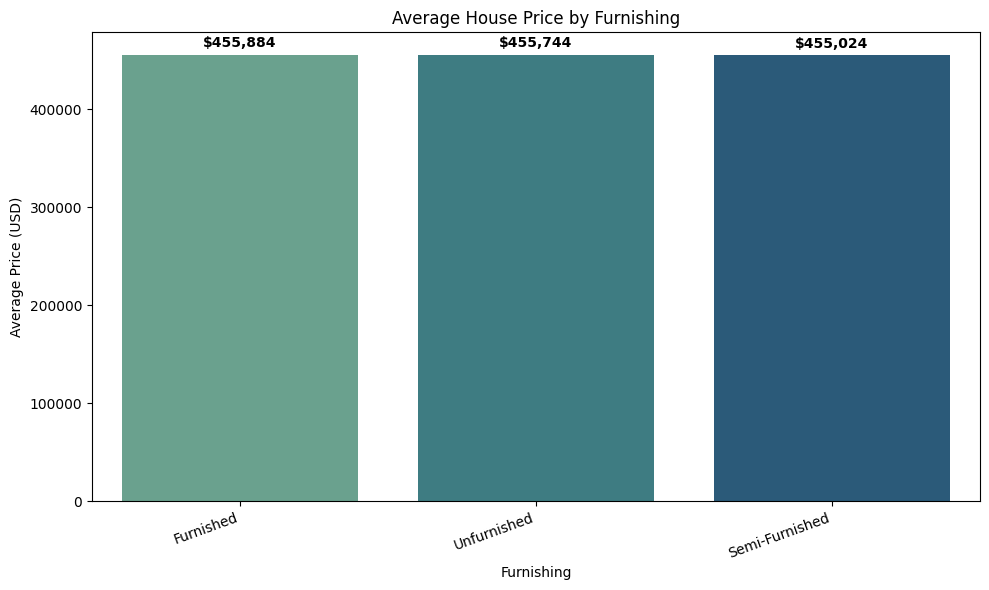

In [11]:
# Calculate average price for each furnishing type
avg_price_by_furnishing = df.groupby('furnishing')['price_usd'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=avg_price_by_furnishing.index, y=avg_price_by_furnishing.values, palette="crest")

# Annotate each bar with the average price
for i, v in enumerate(avg_price_by_furnishing.values):
    plt.text(i, v + avg_price_by_furnishing.max()*0.01, f"${v:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average House Price by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Display a table of the top 10 highest priced houses with all their info
top10 = df.sort_values('price_usd', ascending=False).head(10)
display(top10)

,location,region_type,property_type,year_built,condition,furnishing,bedrooms,bathrooms,stories,parking,...,price_usd,property_tax_usd,insurance_usd,maintenance_usd,rent_usd_month,median_income_usd,employment_rate,cost_of_living_index,crime_index,safety_index
9571,"San Jose, CA",Suburban,House,2007,Excellent,Semi-Furnished,4,2 Baths,1,3,...,856222.0279,8562.220279,4281.110140,1841.338739,22694.343220,110000,0.97,130,40,60
64123,"New York, NY",Urban,Bungalow,1983,Needs Renovation,Semi-Furnished,1,4 Baths,2,2,...,854516.3677,8545.163677,4272.581839,266.852464,12241.483230,95000,0.96,120,50,50
38744,"San Jose, CA",Urban,House,1956,Good,Furnished,3,2 Baths,3,1,...,849074.1492,8490.741492,4245.370746,1037.854465,9266.044044,110000,0.97,130,40,60
49723,"San Jose, CA",Suburban,House,1954,New,Furnished,5,1 Bath,1,1,...,848729.3758,8487.293758,4243.646879,2398.050571,14474.505710,110000,0.97,130,40,60
1080,"San Jose, CA",Urban,House,2002,Excellent,Furnished,4,2 Baths,1,1,...,844654.1905,8446.541905,4223.270953,667.052863,13310.049040,110000,0.97,130,40,60
52422,"San Jose, CA",Suburban,House,1965,Good,Furnished,1,1 Bath,3,2,...,840611.3607,8406.113607,4203.056804,923.071732,13276.180980,110000,0.97,130,40,60
65680,"San Jose, CA",Urban,House,1991,Good,Semi-Furnished,2,2 Baths,2,3,...,831254.5798,8312.545798,4156.272899,2262.952237,8720.658606,110000,0.97,130,40,60
54669,"San Jose, CA",Urban,House,1979,New,Unfurnished,4,3 Baths,2,2,...,824587.8698,8245.878698,4122.939349,2203.246264,13693.668970,110000,0.97,130,40,60
22925,"San Jose, CA",Urban,House,2004,Good,Semi-Furnished,2,3 Baths,1,3,...,824194.7964,8241.947964,4120.973982,659.504308,7983.840779,110000,0.97,130,40,60
62313,"San Jose, CA",Suburban,House,1963,Good,Furnished,3,2 Baths,1,1,...,822744.6158,8227.446158,4113.723079,821.444948,13417.338700,110000,0.97,130,40,60


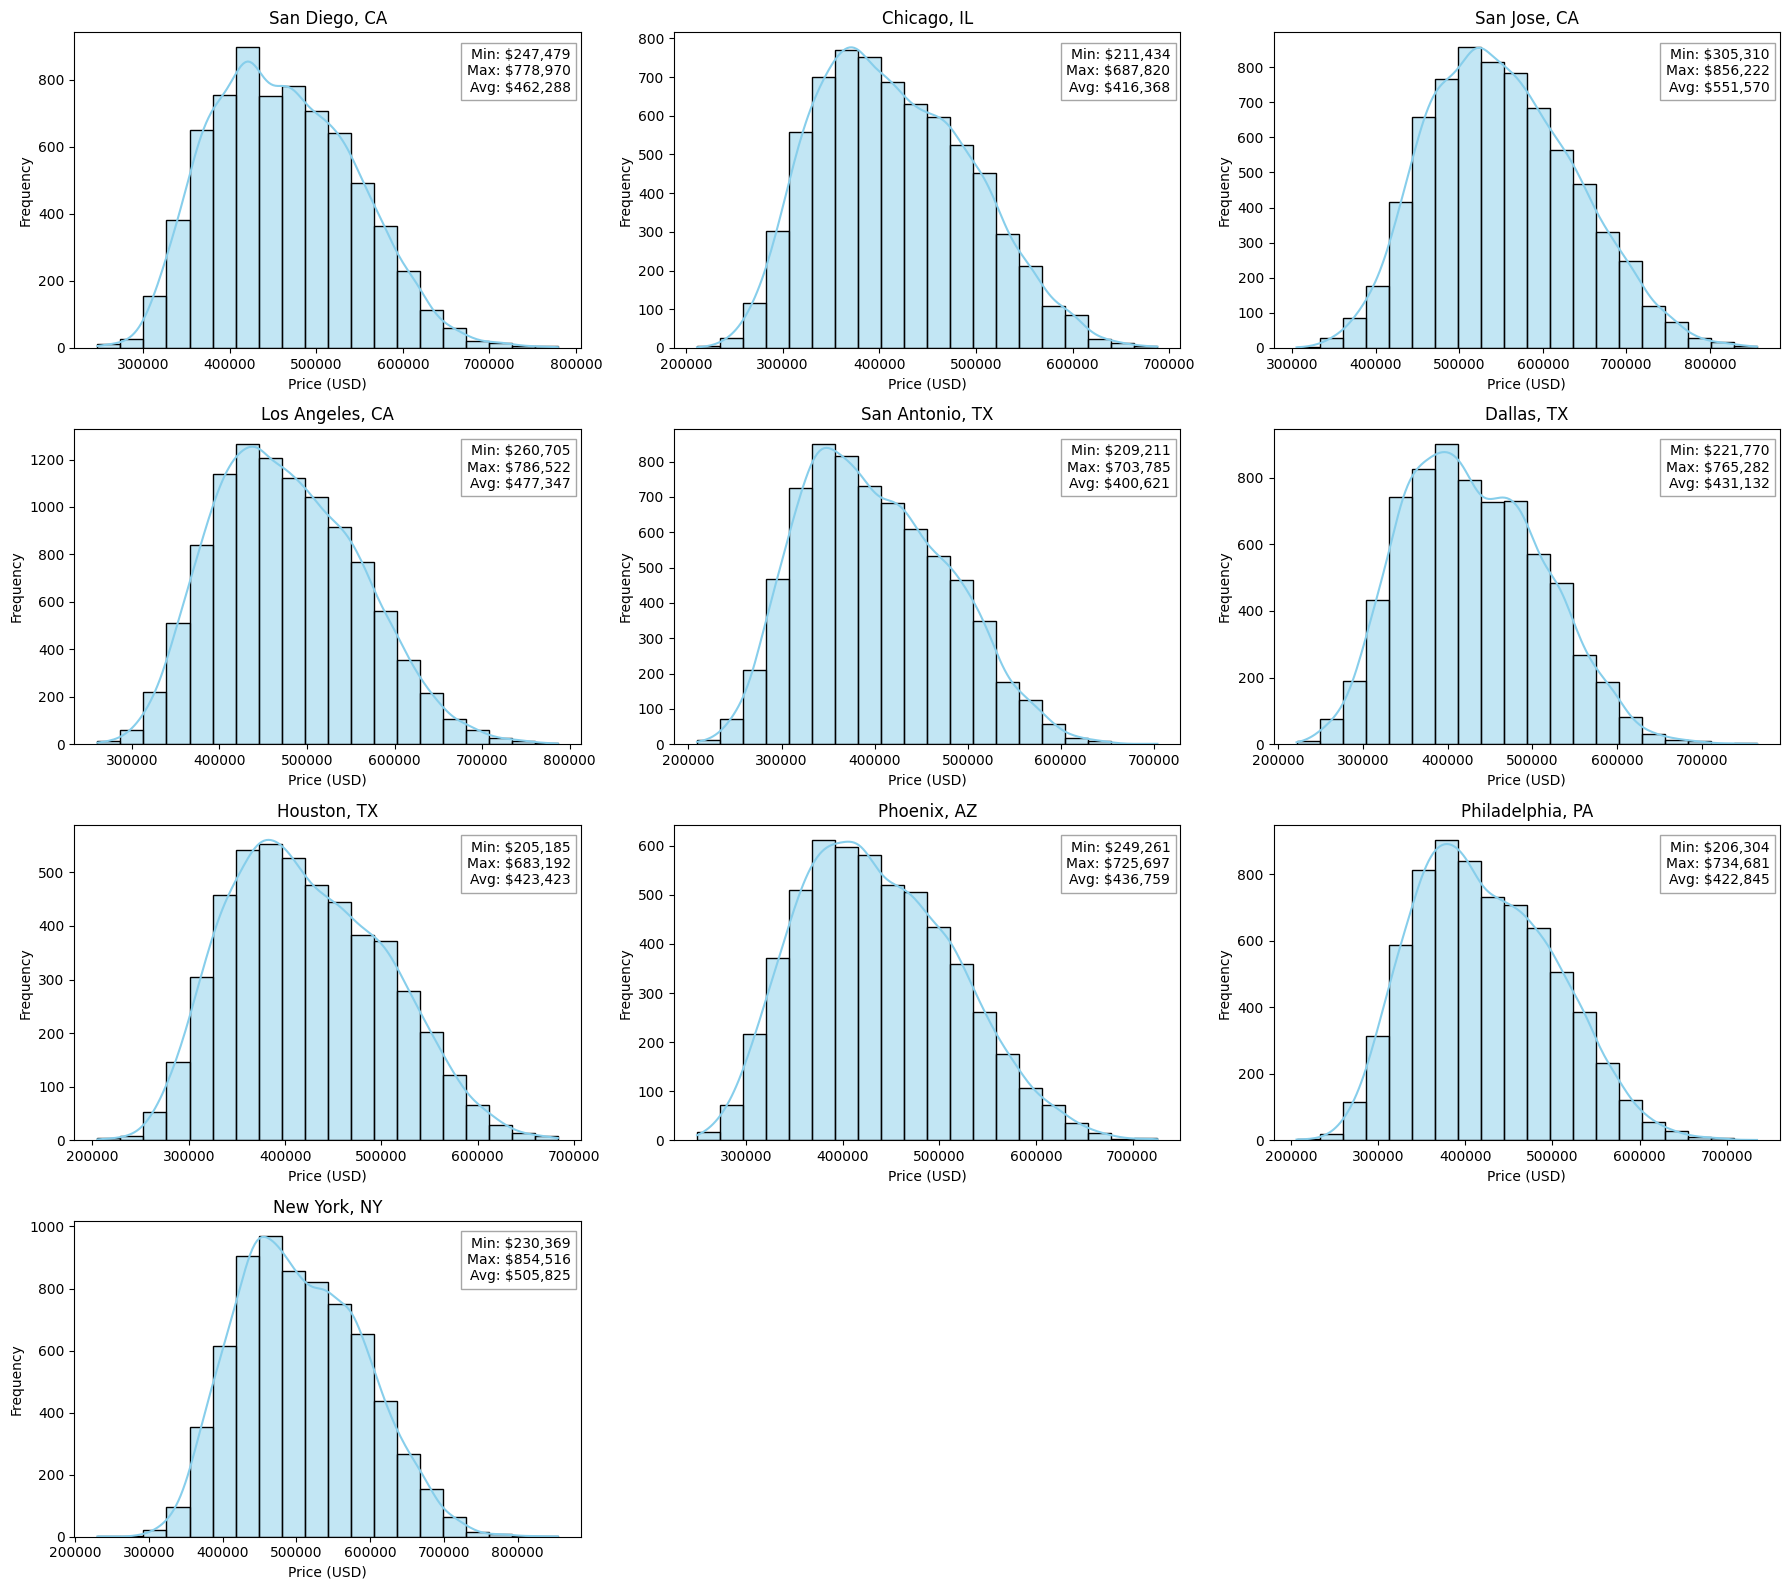

In [16]:
# Individual distribution plots for price_usd for each location, with min, max, and average annotated

locations = df['location'].unique()
n_locations = len(locations)
n_cols = 3
n_rows = (n_locations + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, loc in enumerate(locations, 1):
    plt.subplot(n_rows, n_cols, i)
    prices = df[df['location'] == loc]['price_usd']
    sns.histplot(prices, kde=True, bins=20, color='skyblue')
    plt.title(loc)
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    # Annotate min, max, and average
    min_val = prices.min()
    max_val = prices.max()
    avg_val = prices.mean()
    plt.text(0.98, 0.95, f"Min: ${min_val:,.0f}\nMax: ${max_val:,.0f}\nAvg: ${avg_val:,.0f}",
             ha='right', va='top', transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.show()

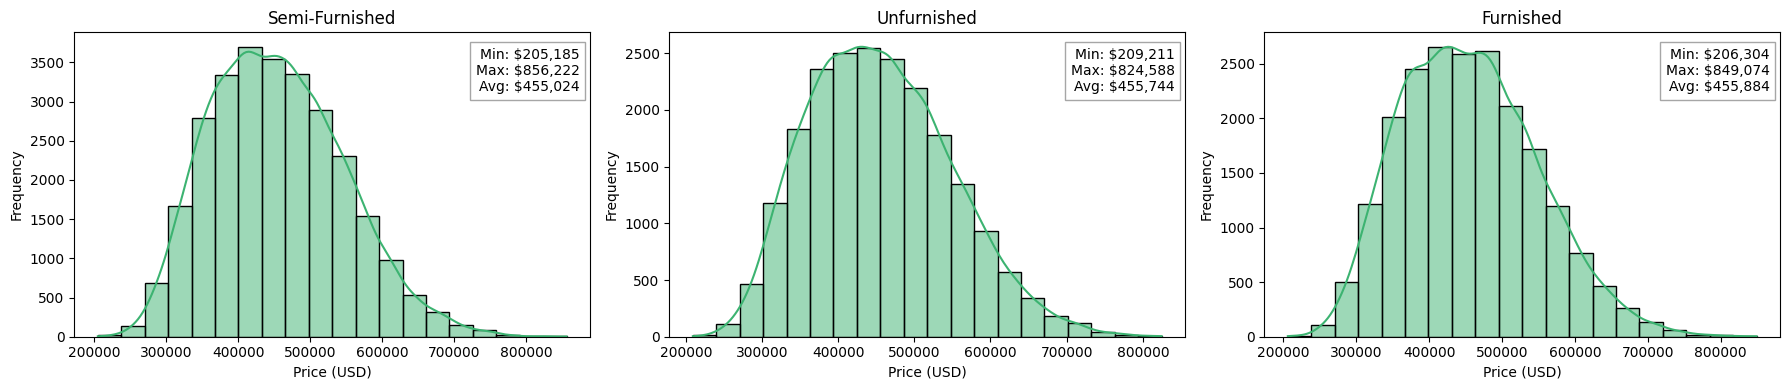

In [17]:
# Individual distribution plots for price_usd for each furnishing type, with min, max, and average annotated

furnishings = df['furnishing'].unique()
n_furnishings = len(furnishings)
n_cols = 3
n_rows = (n_furnishings + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, furn in enumerate(furnishings, 1):
    plt.subplot(n_rows, n_cols, i)
    prices = df[df['furnishing'] == furn]['price_usd']
    sns.histplot(prices, kde=True, bins=20, color='mediumseagreen')
    plt.title(furn)
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    # Annotate min, max, and average
    min_val = prices.min()
    max_val = prices.max()
    avg_val = prices.mean()
    plt.text(0.98, 0.95, f"Min: ${min_val:,.0f}\nMax: ${max_val:,.0f}\nAvg: ${avg_val:,.0f}",
             ha='right', va='top', transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.show()

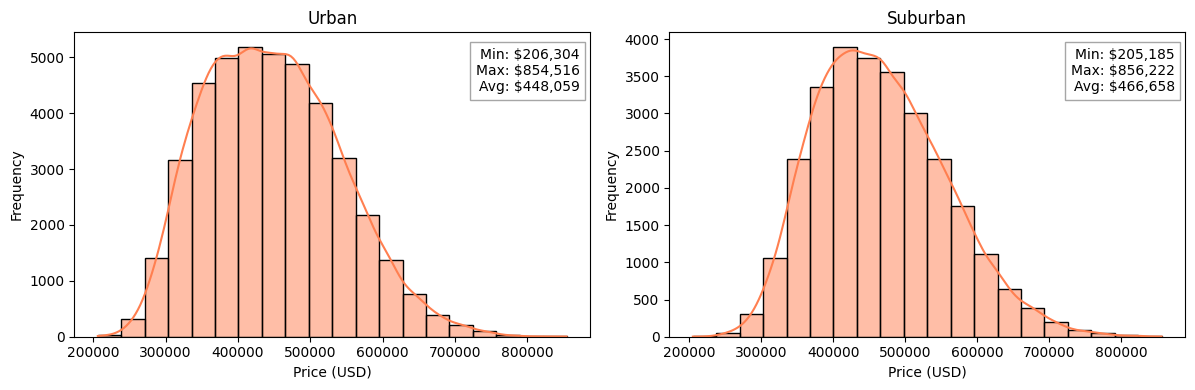

In [18]:
# Individual distribution plots for price_usd for each region type, with min, max, and average annotated

region_types = df['region_type'].unique()
n_region_types = len(region_types)
n_cols = 3
n_rows = (n_region_types + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, region in enumerate(region_types, 1):
    plt.subplot(n_rows, n_cols, i)
    prices = df[df['region_type'] == region]['price_usd']
    sns.histplot(prices, kde=True, bins=20, color='coral')
    plt.title(region)
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    # Annotate min, max, and average
    min_val = prices.min()
    max_val = prices.max()
    avg_val = prices.mean()
    plt.text(0.98, 0.95, f"Min: ${min_val:,.0f}\nMax: ${max_val:,.0f}\nAvg: ${avg_val:,.0f}",
             ha='right', va='top', transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.show()

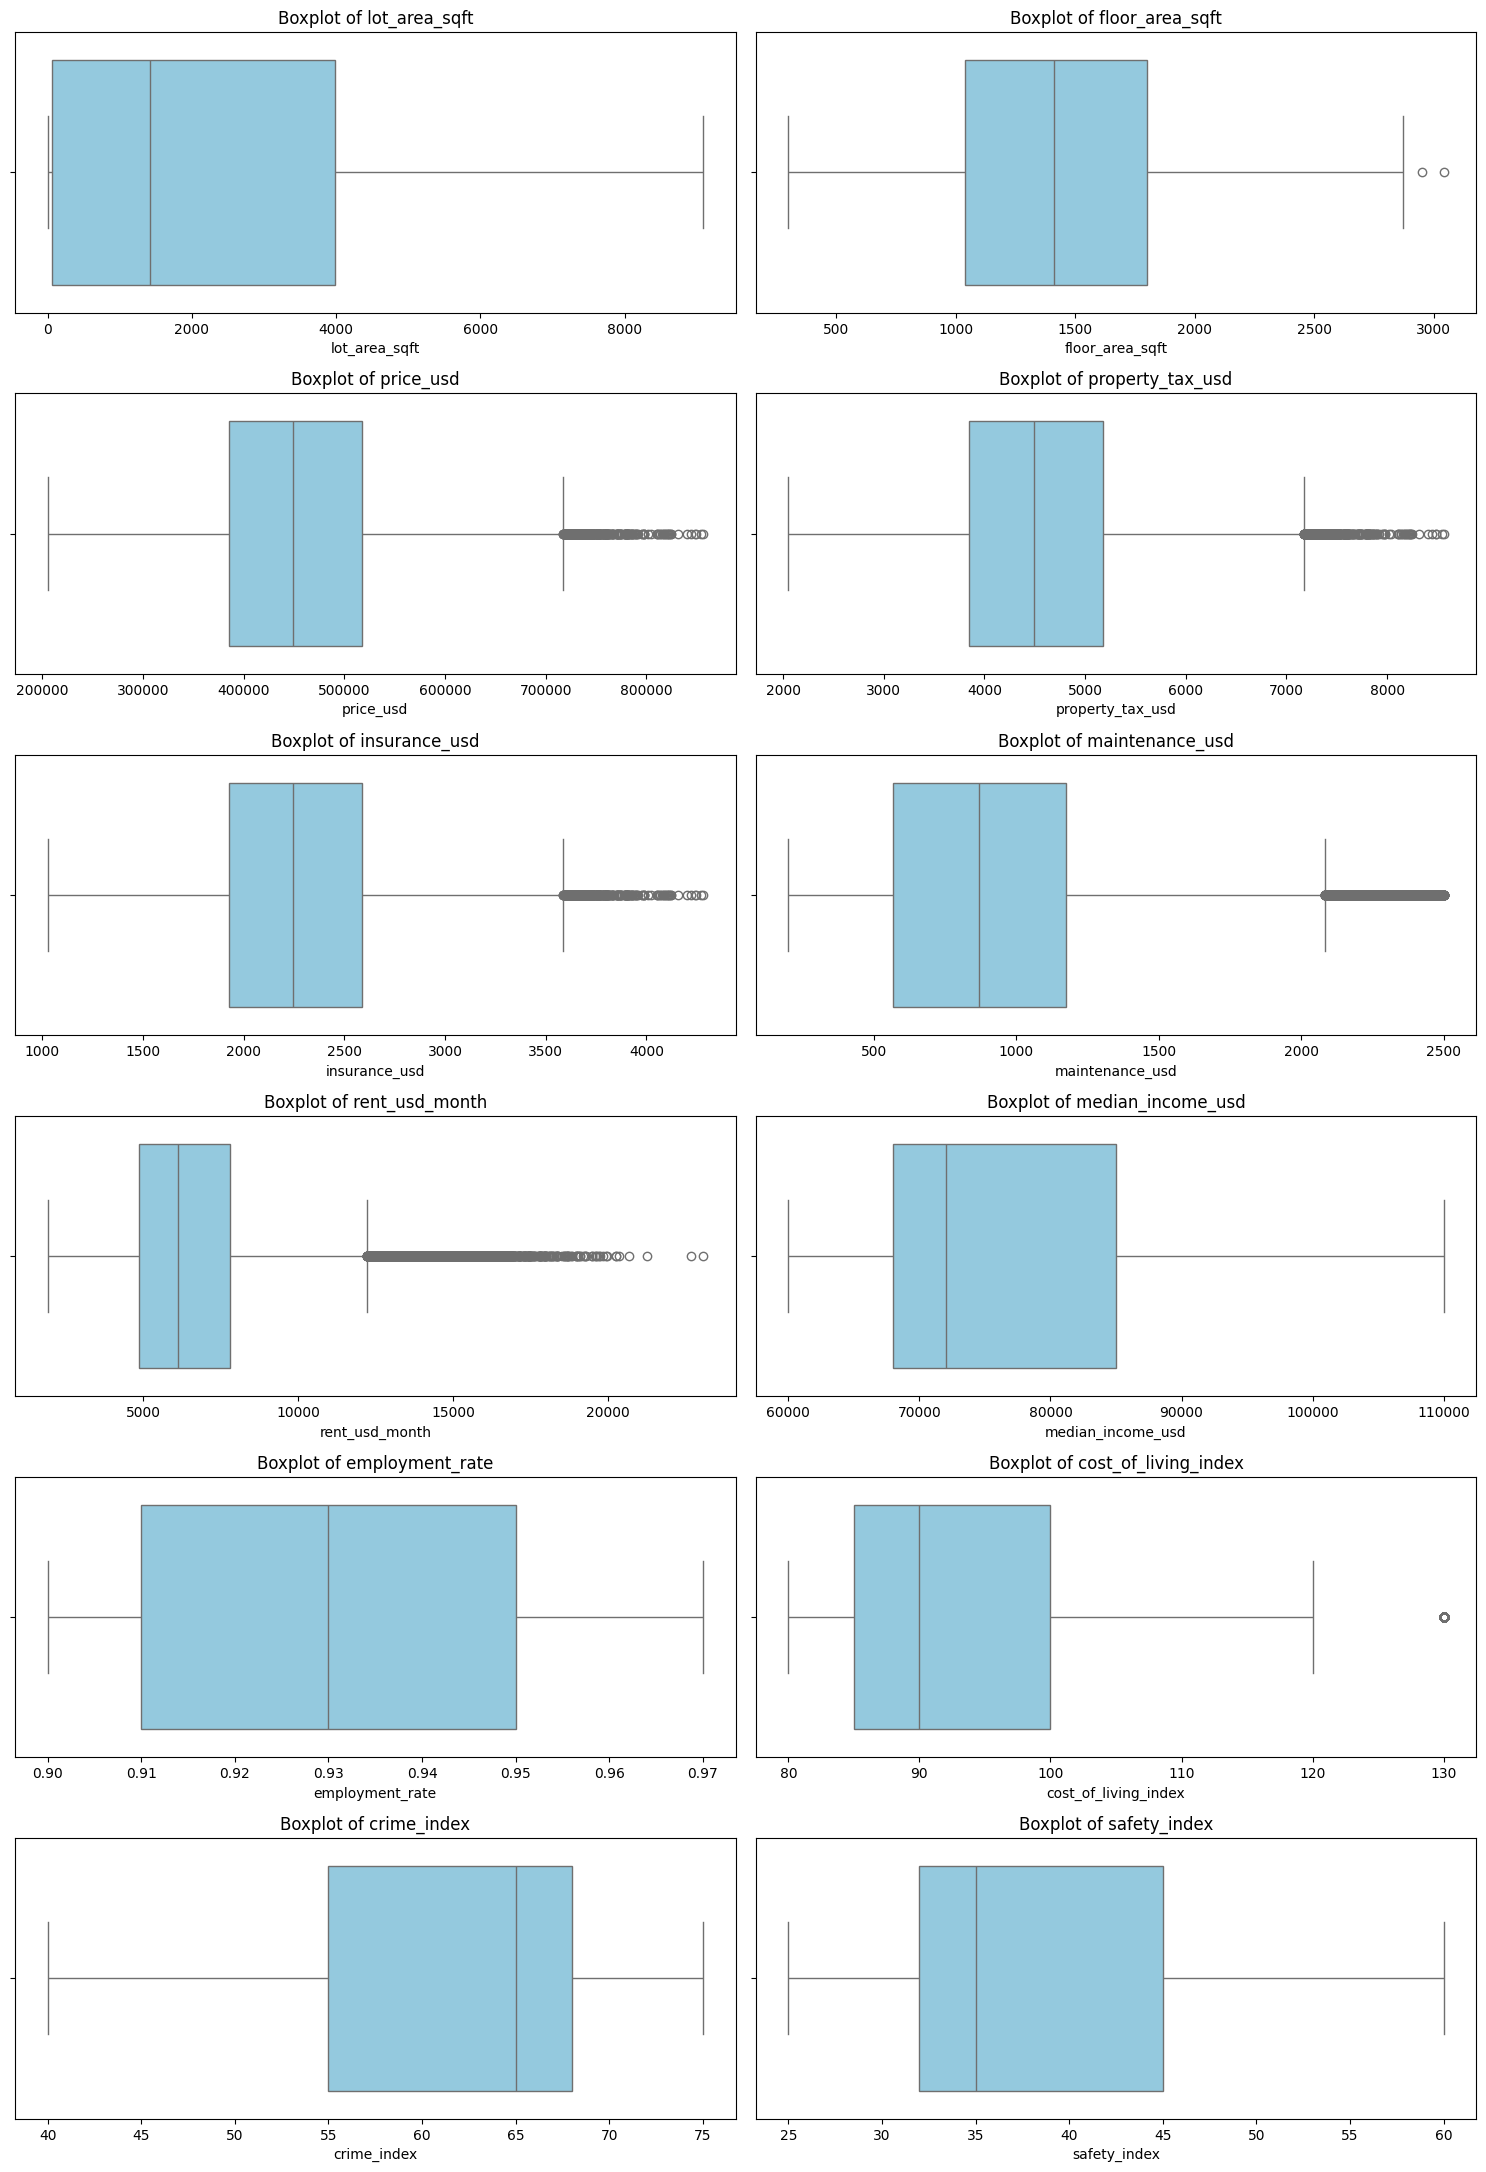

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
num_cols = ['lot_area_sqft','floor_area_sqft','price_usd','property_tax_usd',
            'insurance_usd','maintenance_usd','rent_usd_month',
            'median_income_usd','employment_rate','cost_of_living_index',
            'crime_index','safety_index']

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming the dataset is loaded into a DataFrame called df

# 1. Build new features

# Current year assumption
CURRENT_YEAR = 2025
df['property_age'] = CURRENT_YEAR - df['year_built']

# Living level score: Example combining employment_rate, cost_of_living_index, crime_index, safety_index
# Normalized and combined to a composite score
df['living_level_score'] = (
    (df['employment_rate'] / df['employment_rate'].max()) * 0.4
    + (df['safety_index'] / df['safety_index'].max()) * 0.4
    + ((1 - df['crime_index'] / df['crime_index'].max()) * 0.1)
    + ((1 - df['cost_of_living_index'] / df['cost_of_living_index'].max()) * 0.1)
)

# Parsing bathrooms number from string (e.g. '3 Baths' -> 3, '5+ Baths' -> 5)
def extract_bathrooms(bath_str):
    if '+' in bath_str:
        return int(bath_str.split('+')[0])
    else:
        return int(bath_str.split()[0])

df['bathrooms_num'] = df['bathrooms'].apply(extract_bathrooms)

# Convert garden boolean to int
df['garden'] = df['garden'].astype(int)

# 2. Label encode 'condition' and 'furnishing'
le_condition = LabelEncoder()
le_furnishing = LabelEncoder()

df['condition_encoded'] = le_condition.fit_transform(df['condition'])
df['furnishing_encoded'] = le_furnishing.fit_transform(df['furnishing'])

# 3. One-hot encode remaining categorical variables: location, region_type, property_type
categorical_cols = ['location', 'region_type', 'property_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Feature scaling (only scale numerical features, exclude categorical and target)
features_to_scale = [
    'bedrooms', 'stories', 'parking', 'lot_area_sqft', 'floor_area_sqft',
    'property_tax_usd', 'insurance_usd', 'maintenance_usd', 'rent_usd_month',
    'median_income_usd', 'employment_rate', 'cost_of_living_index',
    'crime_index', 'safety_index', 'property_age', 'living_level_score', 'bathrooms_num'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 5. Define features and target
X = df.drop(columns=['price_usd', 'condition', 'furnishing', 'bathrooms', 'year_built'])
y = df['price_usd']

# 6. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Perform 5-fold cross-validation with negative MSE scoring
cv_mse_scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_mse_scores)

print(f"Cross-validated RMSE scores (5 folds): {cv_rmse_scores}")
print(f"Mean RMSE: {cv_rmse_scores.mean():.2f}")
print(f"Std RMSE: {cv_rmse_scores.std():.2f}\n")

# Fit model on entire training set
dt_model.fit(X_train, y_train)

# Predict on train and test set
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluation function including RMSE
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Manually compute RMSE by square root of MSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Evaluation:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print()

# Evaluate train performance
evaluate_model(y_train, y_train_pred, "Training")

# Evaluate test performance
evaluate_model(y_test, y_test_pred, "Test")


Cross-validated RMSE scores (5 folds): [2279.10685454 2234.79975111 2289.89105749 2330.40622951 2330.13165473]
Mean RMSE: 2292.87
Std RMSE: 35.69

Training Evaluation:
  Mean Squared Error (MSE): 5114448.56
  Root Mean Squared Error (RMSE): 2261.51
  Mean Absolute Error (MAE): 1718.42
  R-squared (R2): 0.9994

Test Evaluation:
  Mean Squared Error (MSE): 5019279.78
  Root Mean Squared Error (RMSE): 2240.37
  Mean Absolute Error (MAE): 1720.02
  R-squared (R2): 0.9994



In [29]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Perform 5-fold cross-validation with negative MSE scoring
cv_mse_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_xgb = np.sqrt(-cv_mse_scores_xgb)

print(f"XGBoost 5-fold Cross-validated RMSE scores: {cv_rmse_scores_xgb}")
print(f"Mean RMSE: {cv_rmse_scores_xgb.mean():.2f}")
print(f"Std RMSE: {cv_rmse_scores_xgb.std():.2f}\n")

# Fit model on training set
xgb_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Evaluation:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print()

# Evaluate training performance
evaluate_model(y_train, y_train_pred_xgb, "Training - XGBoost")

# Evaluate test performance
evaluate_model(y_test, y_test_pred_xgb, "Test - XGBoost")


XGBoost 5-fold Cross-validated RMSE scores: [2157.444109   1745.16028368 1899.12969429 2555.76039272 2187.93617792]
Mean RMSE: 2109.09
Std RMSE: 277.34

Training - XGBoost Evaluation:
  Mean Squared Error (MSE): 1279105.12
  Root Mean Squared Error (RMSE): 1130.98
  Mean Absolute Error (MAE): 492.31
  R-squared (R2): 0.9999

Test - XGBoost Evaluation:
  Mean Squared Error (MSE): 3372516.30
  Root Mean Squared Error (RMSE): 1836.44
  Mean Absolute Error (MAE): 557.14
  R-squared (R2): 0.9996

